In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py

from keras.models import load_model
from tensorflow.keras.optimizers import Adam 



In [43]:
lead_order = ["DI", "DII", "DIII", "AVL", "AVF", "AVR", "V1", "V2", "V3", "V4", "V5", "V6"]
path_data = "/Users/mathi/Documents/M2_ProjetML"


df_goldStandard = pd.read_csv(f"{path_data}""/data/annotations/gold_standard.csv")
df_goldStandard['nb_abnormality'] =  df_goldStandard.sum(axis=1)
print("gold_standard annotation for this test dataset. When the cardiologist 1 and cardiologist 2 agree, the common diagnosis was considered as gold standard. In cases where there was any disagreement, a third senior specialist, aware of the annotations from the other two, decided the diagnosis")
display(df_goldStandard)

gold_standard annotation for this test dataset. When the cardiologist 1 and cardiologist 2 agree, the common diagnosis was considered as gold standard. In cases where there was any disagreement, a third senior specialist, aware of the annotations from the other two, decided the diagnosis


1dAVb  RBBB  LBBB  SB  AF  ST  nb_abnormality
0        0     0     0   0   0   0               0
1        0     0     1   0   0   0               1
2        0     0     0   0   0   0               0
3        0     0     0   0   0   0               0
4        0     0     0   0   0   0               0
..     ...   ...   ...  ..  ..  ..             ...
822      0     0     0   0   0   0               0
823      0     0     0   0   0   0               0
824      0     0     0   0   0   0               0
825      0     0     0   0   0   0               0
826      1     0     0   0   0   0               1

[827 rows x 7 columns]

csv attributes nous renseigne l'âge et le sexe de tout les patients de l'étude.

In [9]:
df_attributes = pd.read_csv("/Users/mathi/Documents/M2_ProjetML/data/attributes.csv")
display(df_attributes)

age sex
0     34   M
1     70   F
2     52   F
3     41   F
4     32   F
..   ...  ..
822   77   F
823   33   F
824   46   F
825   41   F
826   21   M

[827 rows x 2 columns]

Nous avons aussi deux fichier csv qui recensent les diagnostics d'anormalités respectifs des cardiologistes 1 et 2

In [40]:
df_cardio1 = pd.read_csv("/Users/mathi/Documents/M2_ProjetML/data/annotations/cardiologist1.csv")
df_cardio2 = pd.read_csv("/Users/mathi/Documents/M2_ProjetML/data/annotations/cardiologist2.csv")

display(df_cardio1)

cpt = 0
for i in range(len(df_cardio1)):
    if(sum(df_cardio1.iloc[i]==df_cardio2.iloc[i])==6):
        cpt+=1
        
cpt/=len(df_cardio1)
cpt*=100

print('Sur ces deux datasets, les cardiologues ont le même diagnostic dans %0.3f'%cpt+'% des cas')

1dAVb  RBBB  LBBB  SB  AF  ST
0        0     0     0   0   0   0
1        0     0     0   0   0   0
2        0     0     0   0   0   0
3        0     0     0   0   0   0
4        0     0     0   0   0   0
..     ...   ...   ...  ..  ..  ..
822      0     0     0   0   0   0
823      0     0     0   0   0   0
824      0     0     0   0   0   0
825      0     0     0   0   0   0
826      0     0     0   0   0   0

[827 rows x 6 columns]

Sur ces deux datasets, les cardiologues ont le même diagnostic dans 96.010% des cas


In [42]:
df_MedStudent = pd.read_csv("/Users/mathi/Documents/M2_ProjetML/data/annotations/medical_students.csv")
print('Diagnostic émis par 2 élèves en dernière année de médecine')
display(df_MedStudent)

Diagnostic émis par 2 élèves en dernière année de médecine


1dAVb  RBBB  LBBB  SB  AF  ST
0        0     0     0   0   0   0
1        0     0     0   0   0   0
2        0     0     0   0   0   0
3        0     0     0   0   0   0
4        0     0     0   0   0   0
..     ...   ...   ...  ..  ..  ..
822      0     0     0   0   0   0
823      0     0     0   0   0   0
824      0     0     0   0   0   0
825      0     0     0   0   0   0
826      1     0     0   0   0   0

[827 rows x 6 columns]

ecg_tracings contient les tracés des électrocardiogrammes des patients de l'étude.

On print ci-dessous les diagnostic gold_standard des 20 premiers patients de l'étude : 

In [52]:
print(df_goldStandard.shape)
display(df_goldStandard.head(20).T)
with h5py.File(f"{path_data}/data/ecg_tracings.hdf5", "r") as f:
    x = np.array(f['tracings'])
print(x.shape)
print(x.shape[0]," nb de patients")
print(x.shape[1]," nb de sample du signal")
print(x.shape[2],' nb de dérivations pour un ECG')

(827, 7)


0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  \
1dAVb            0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   
RBBB             0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
LBBB             0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   
SB               0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
AF               0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
ST               0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
nb_abnormality   0   1   0   0   0   0   0   0   0   0   0   0   1   0   0   

                15  16  17  18  19  
1dAVb            1   0   0   1   0  
RBBB             0   0   0   0   0  
LBBB             1   0   0   1   0  
SB               0   0   0   0   0  
AF               0   0   0   0   0  
ST               0   0   0   0   0  
nb_abnormality   2   0   0   2   0

(827, 4096, 12)
827  nb de patients
4096  nb de sample du signal
12  nb de dérivations pour un ECG


si on plot les 12 dérivations pour un patient on obtient :


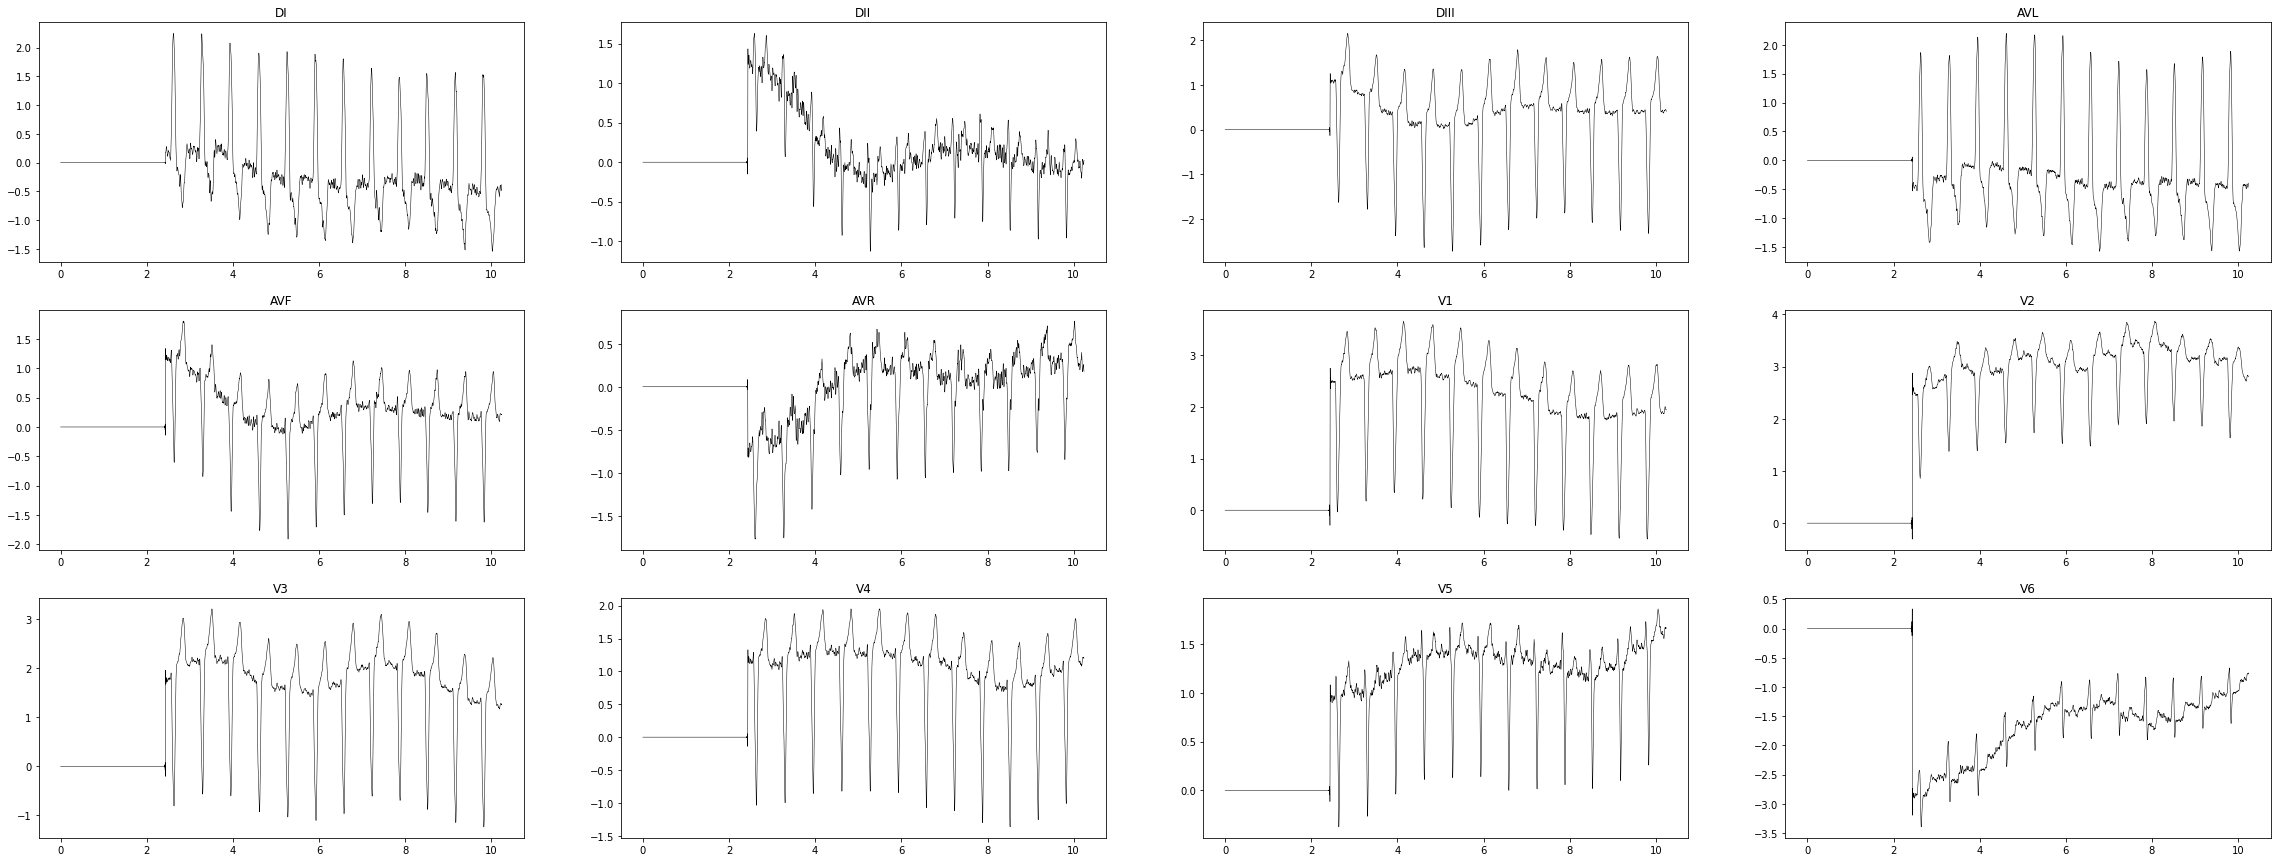

In [86]:
print('si on plot les 12 dérivations pour un patient on obtient :')

fig, axs = plt.subplots(3, 4,figsize=(40,15))

for i in range(3):
    for j in range(4):
        ax = axs[i,j]
        ax.set_title(lead_order[j+i*4])
        ax.plot(np.linspace(0,10.24,4096),x[1,:,j+i*4],'k', linewidth=.5)

On importe le modèle déja entrainé sur les données : 

In [71]:
model = load_model(f"{path_data}/model/model.hdf5", compile=False)
model.compile(loss='binary_crossentropy', optimizer=Adam())

for layer in model.layers:
    print(layer.output_shape)
print(model.summary())

[(None, 4096, 12)]
(None, 4096, 64)
(None, 4096, 64)
(None, 4096, 64)
(None, 4096, 128)
(None, 4096, 128)
(None, 4096, 128)
(None, 4096, 128)
(None, 1024, 64)
(None, 1024, 128)
(None, 1024, 128)
(None, 1024, 128)
(None, 1024, 128)
(None, 1024, 128)
(None, 1024, 128)
(None, 1024, 196)
(None, 1024, 196)
(None, 1024, 196)
(None, 1024, 196)
(None, 256, 128)
(None, 256, 196)
(None, 256, 196)
(None, 256, 196)
(None, 256, 196)
(None, 256, 196)
(None, 256, 196)
(None, 256, 256)
(None, 256, 256)
(None, 256, 256)
(None, 256, 256)
(None, 64, 196)
(None, 64, 256)
(None, 64, 256)
(None, 64, 256)
(None, 64, 256)
(None, 64, 256)
(None, 64, 256)
(None, 64, 320)
(None, 64, 320)
(None, 64, 320)
(None, 64, 320)
(None, 16, 256)
(None, 16, 320)
(None, 16, 320)
(None, 16, 320)
(None, 16, 320)
(None, 16, 320)
(None, 16, 320)
(None, 5120)
(None, 6)
Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape   

In [72]:
import tensorflow as tf
from keras import backend as k


def find_last_conv(model):
    for layer in reversed(model.layers):
        if len(layer.output_shape) == 3:
            return layer.name


def grad_cam(model, time_serie, class_index, relative=True): ##Visualize how parts of the image affects neural network's output by looking into the activation maps
  
    '''
  version img :
  https://github.com/sicara/tf-explain/blob/master/tf_explain/core/grad_cam.py
  '''
  
    grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(find_last_conv(model)).output, model.output])
    with tf.GradientTape() as tape: ## tf.GradientTape calcule le gradient en un point cf après avec tape
        inputs = tf.cast([time_serie], tf.float32) ## change le type de la valeurs
        conv_outputs, predictions = grad_model(inputs) ## Output du model
        loss = predictions[:, class_index] 

    
    grads = tape.gradient(loss, conv_outputs) 
    A = np.asarray(conv_outputs[0,:,:])
    dy = np.asarray(grads[0,:,:])
    a_k = dy.mean(axis=0)
    heat_map = np.sum(a_k*A, axis=1)
    heat_map = heat_map * (heat_map>0)
  
    if relative :
        heat_map /= heat_map.max()+1e-6
    return heat_map


In [98]:
from scipy.interpolate import interp1d

def plot_grad_cam_ecg(ts, check_y, selected_leads=False, relatives=True):
    hm = grad_cam(model, ts, check_y, relative=relatives)
    hm_interp = interp1d(np.linspace(0,10.24,16), hm, kind='slinear')
    if selected_leads:
        fig, axs = plt.subplots(1, 3,figsize=(40,5))
        for i,pos in enumerate([1,6,11]):
            ax = axs[i]
            ax.set_title(lead_order[pos],fontsize=10)
            ax.plot(np.linspace(0,10.24,4096),ts[:,pos],'k', linewidth=.5)
            t = ax.scatter(np.linspace(0,10.24,4096),ts[:,pos],linewidths=.1,c=hm_interp(np.linspace(0,10.24,4096)))
        fig.colorbar(t,ax=axs)
        plt.show()
    
    else :
        fig, axs = plt.subplots(4, 3,figsize=(20,16))
        for i in range(12):
            ax = axs[i//3, i%3]
            ax.set_title(lead_order[i],fontsize=10)
            ax.plot(np.linspace(0,10.24,4096),ts[:,i],'k', linewidth=.5)
            t = ax.scatter(np.linspace(0,10.24,4096),ts[:,i],linewidths=.1,c=hm_interp(np.linspace(0,10.24,4096)))
        fig.colorbar(t,ax=axs)
        plt.show()

1dAVb 0
RBBB 1
LBBB 2
SB 3
AF 4
ST 5
-----------------------------------------------------------------


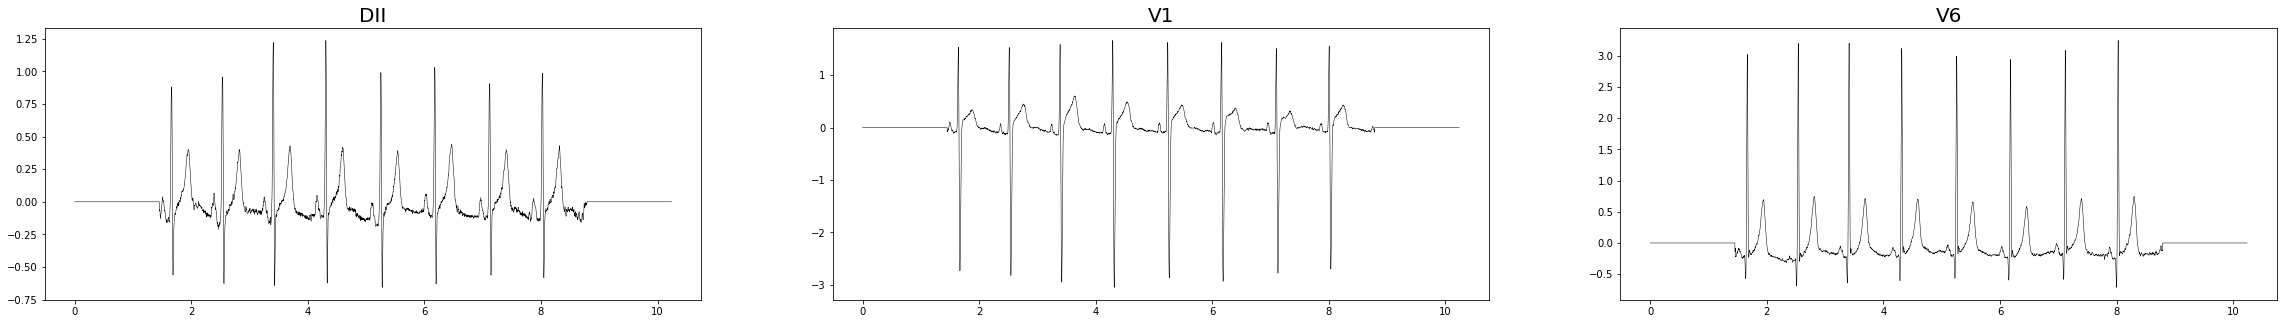

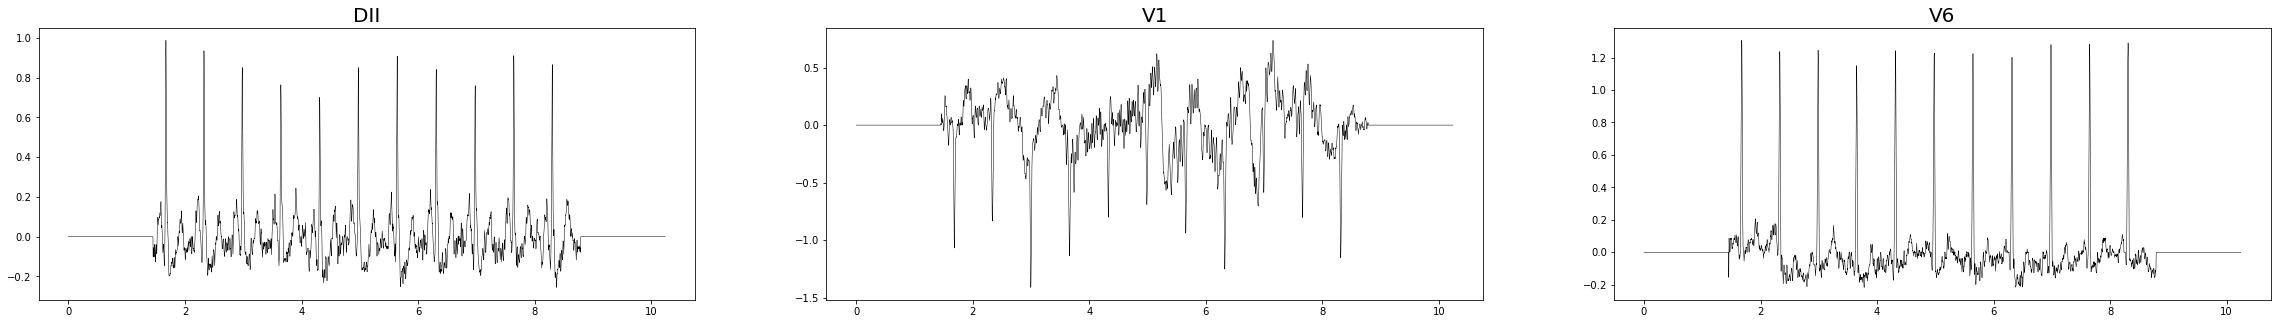

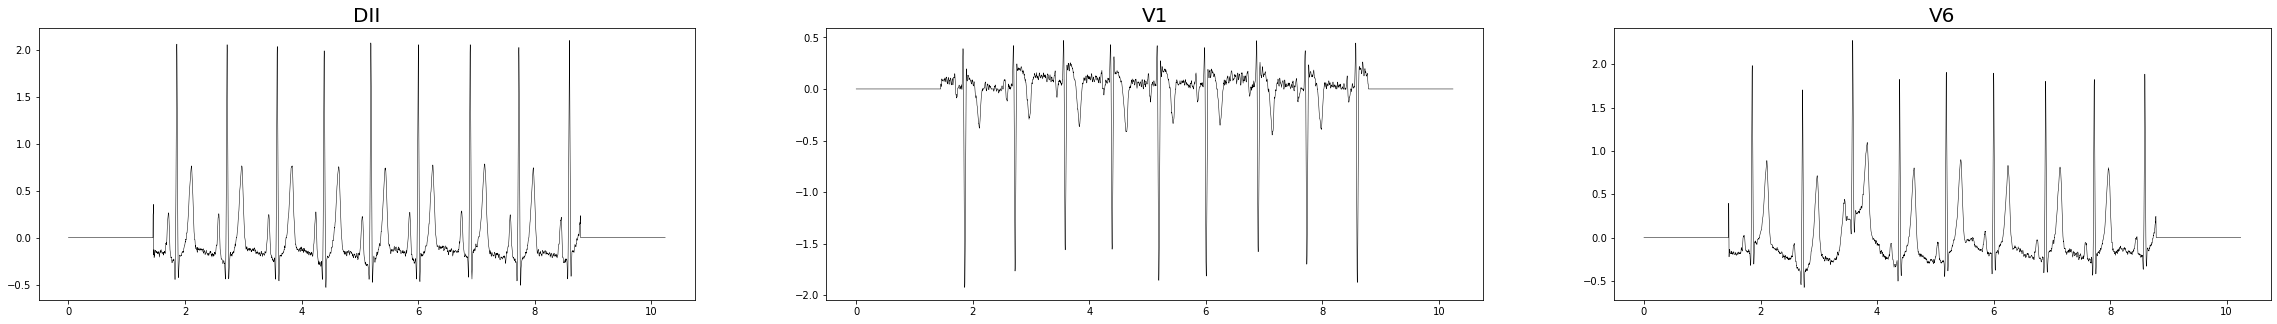

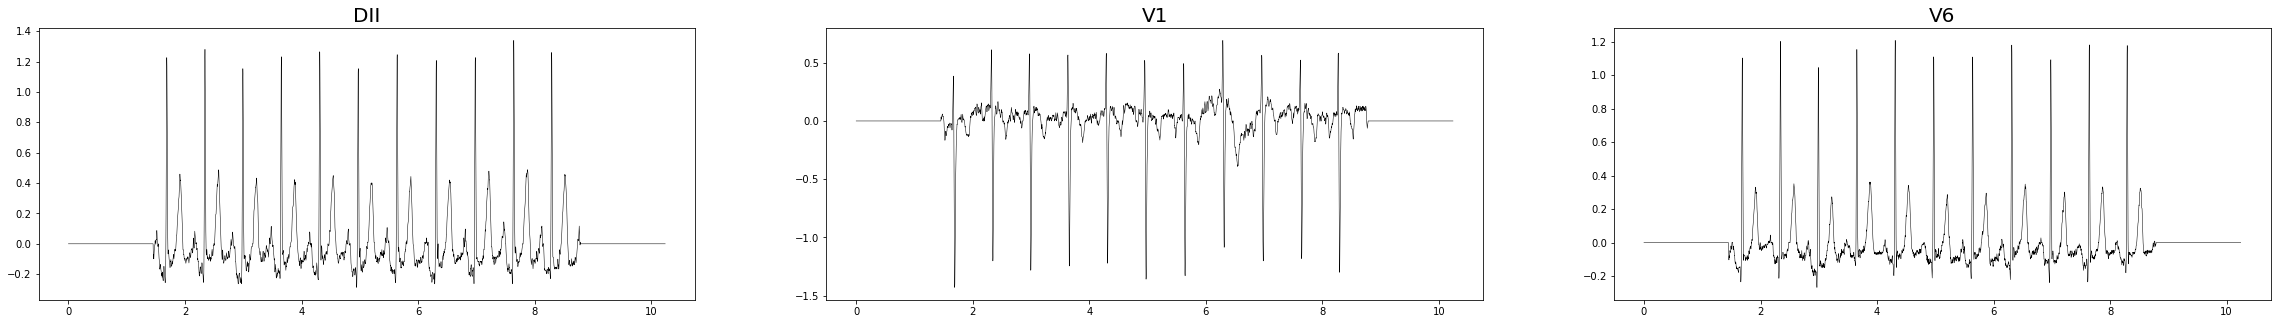

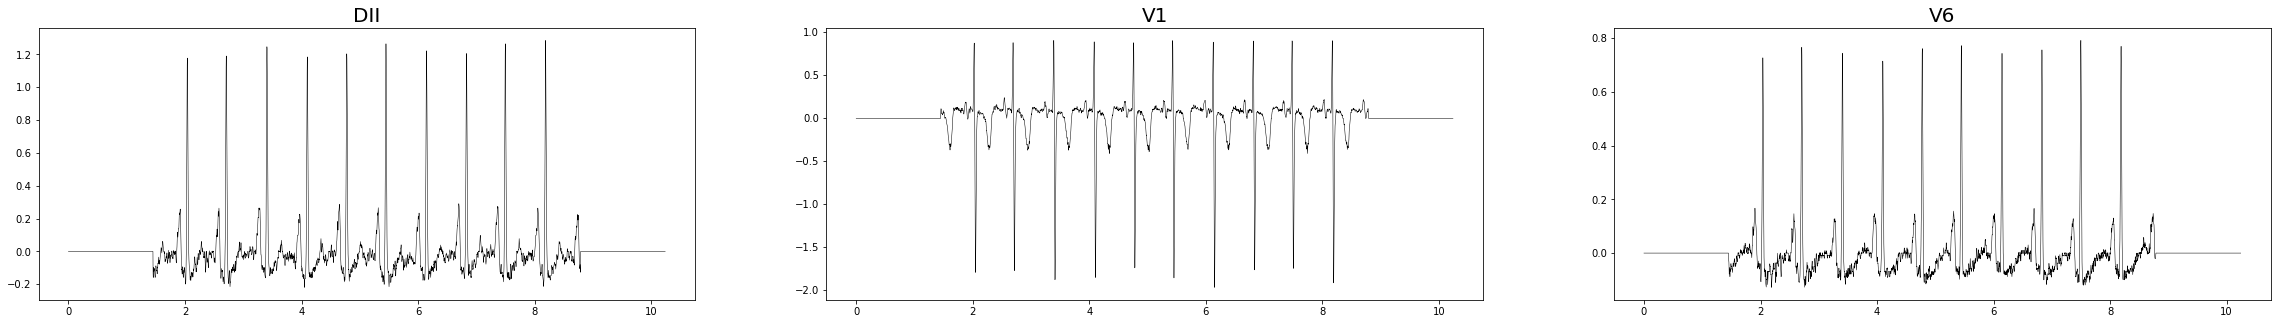



###########	1dAVb	###########

1dAVb             1
RBBB              0
LBBB              0
SB                0
AF                0
ST                0
nb_abnormality    1
Name: 12, dtype: int64
[0.19 0.   0.   0.   0.   0.  ]


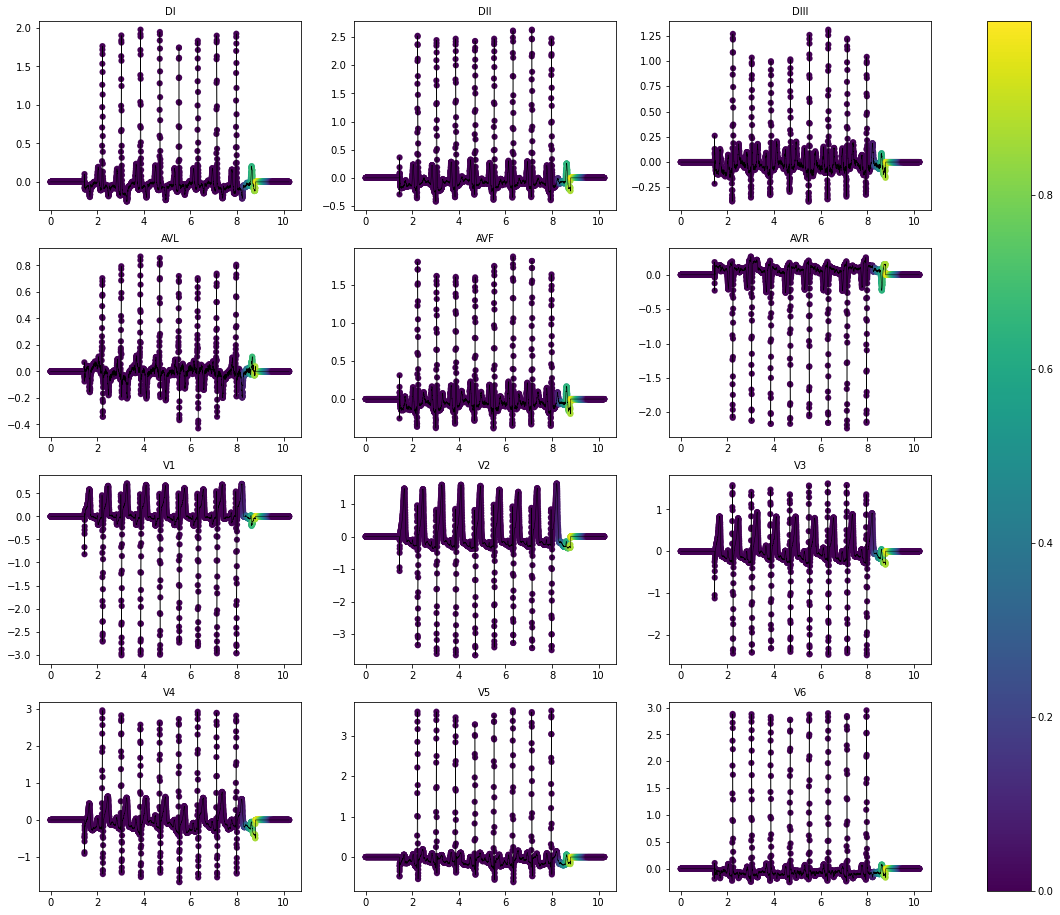

1dAVb             1
RBBB              0
LBBB              0
SB                0
AF                0
ST                0
nb_abnormality    1
Name: 32, dtype: int64
[0.16 0.   0.   0.   0.06 0.  ]


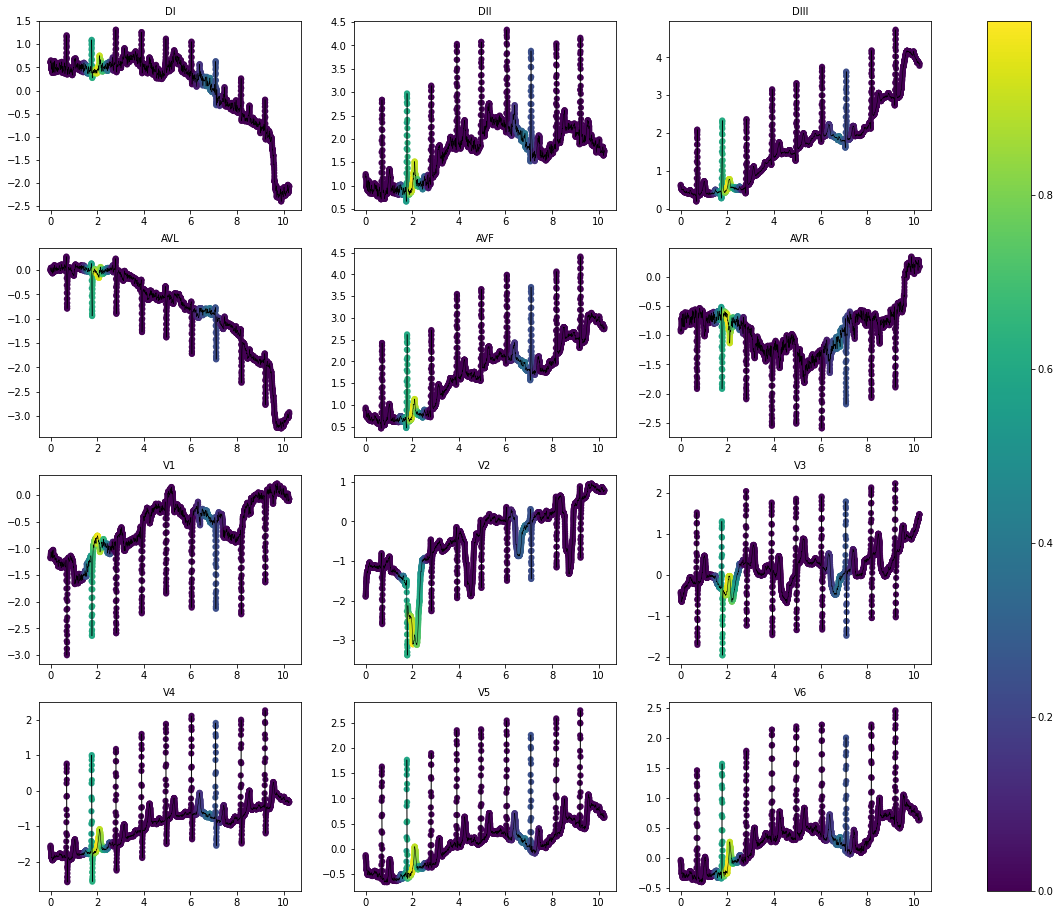

1dAVb             1
RBBB              0
LBBB              0
SB                0
AF                0
ST                0
nb_abnormality    1
Name: 57, dtype: int64
[0.06 0.   0.   0.   0.   0.  ]


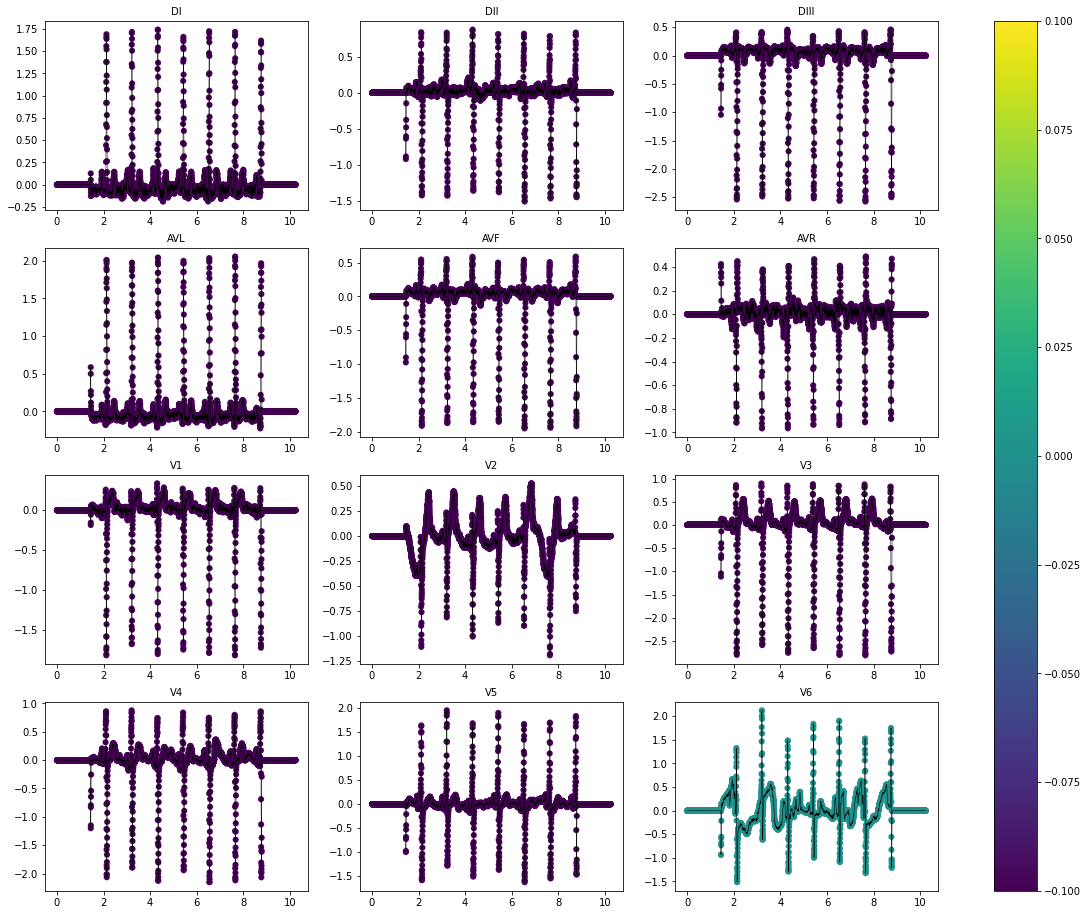



###########	RBBB	###########

1dAVb             0
RBBB              1
LBBB              0
SB                0
AF                0
ST                0
nb_abnormality    1
Name: 106, dtype: int64
[0.   0.79 0.   0.   0.   0.  ]


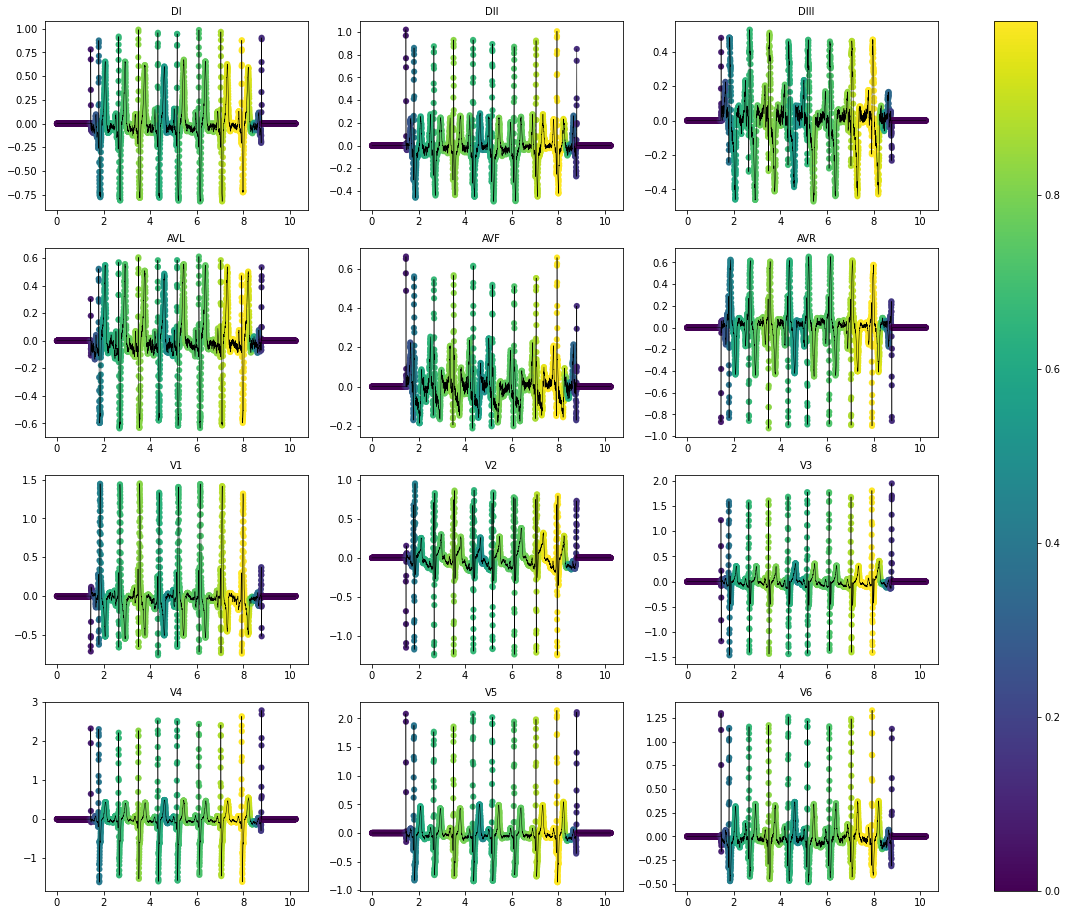

1dAVb             0
RBBB              1
LBBB              0
SB                0
AF                0
ST                0
nb_abnormality    1
Name: 241, dtype: int64
[0.   0.43 0.   0.   0.   0.  ]


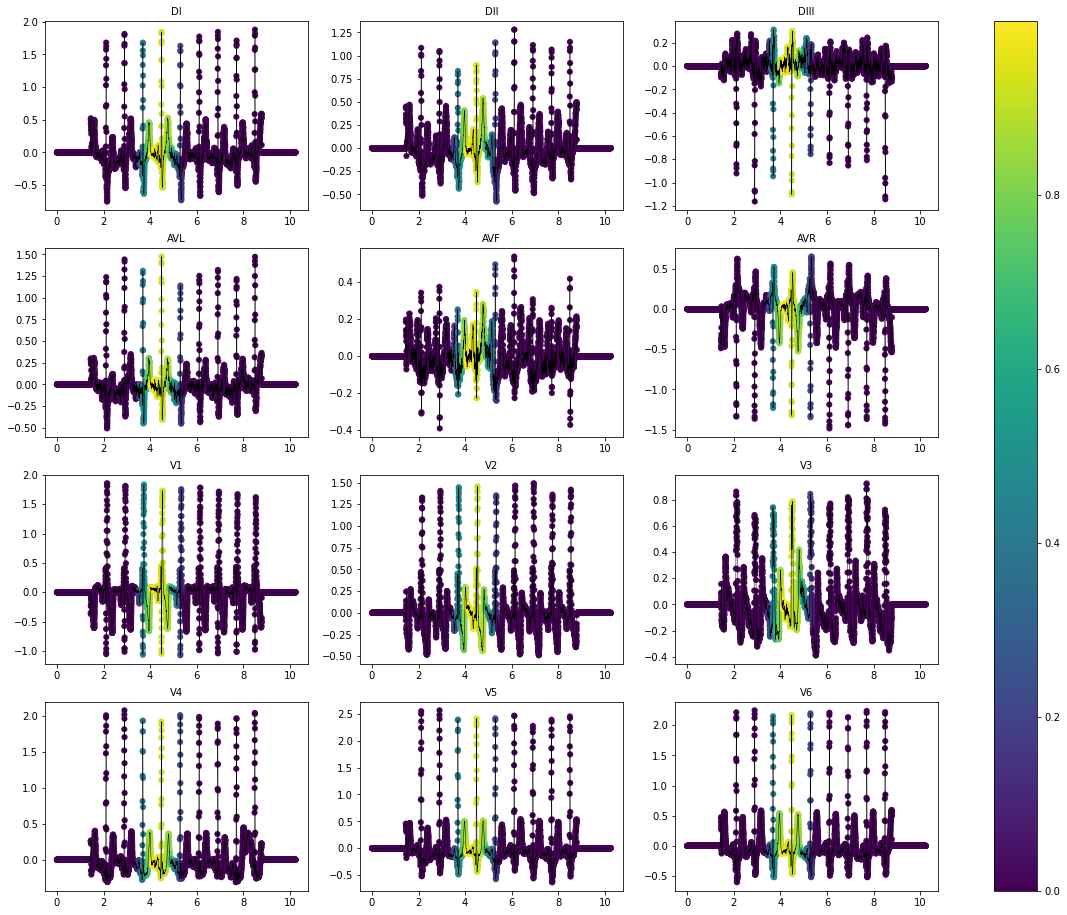

1dAVb             0
RBBB              1
LBBB              0
SB                0
AF                0
ST                0
nb_abnormality    1
Name: 255, dtype: int64
[0.02 0.74 0.   0.   0.   0.  ]


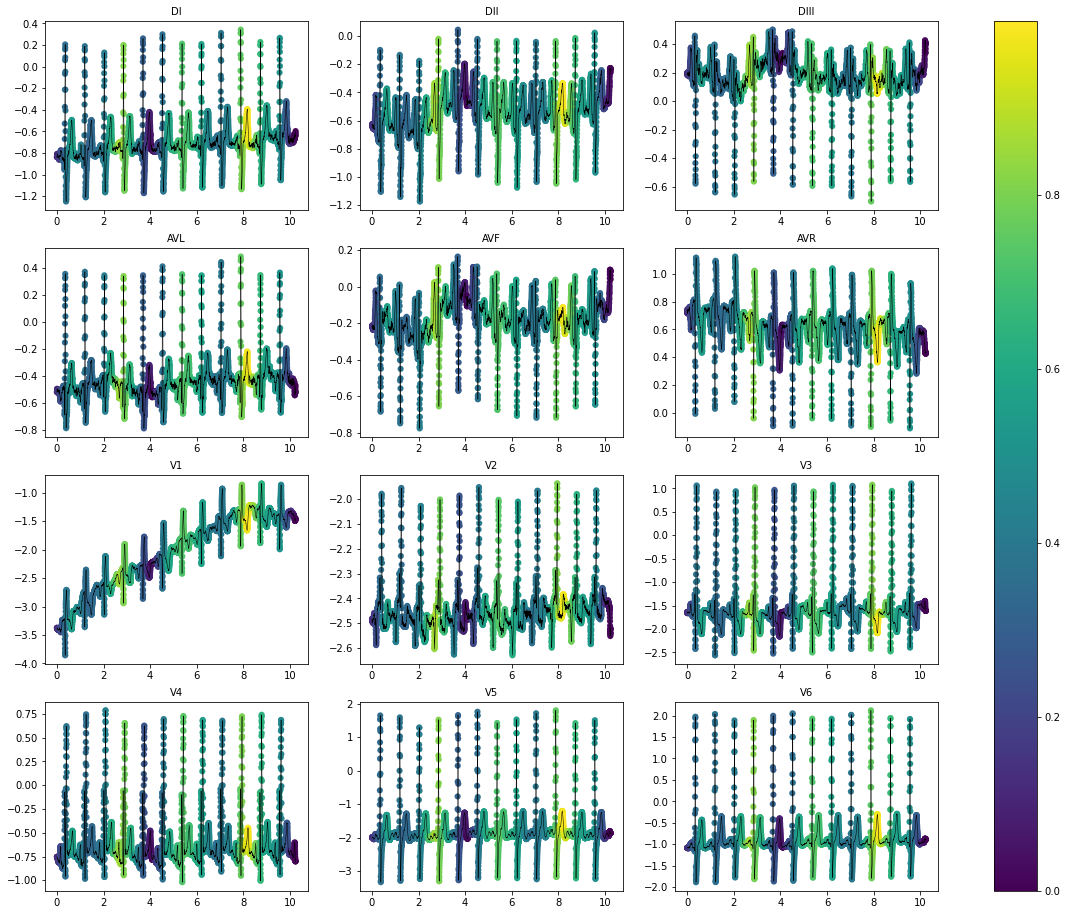



###########	LBBB	###########

1dAVb             0
RBBB              0
LBBB              1
SB                0
AF                0
ST                0
nb_abnormality    1
Name: 1, dtype: int64
[0.03 0.   0.32 0.   0.05 0.  ]


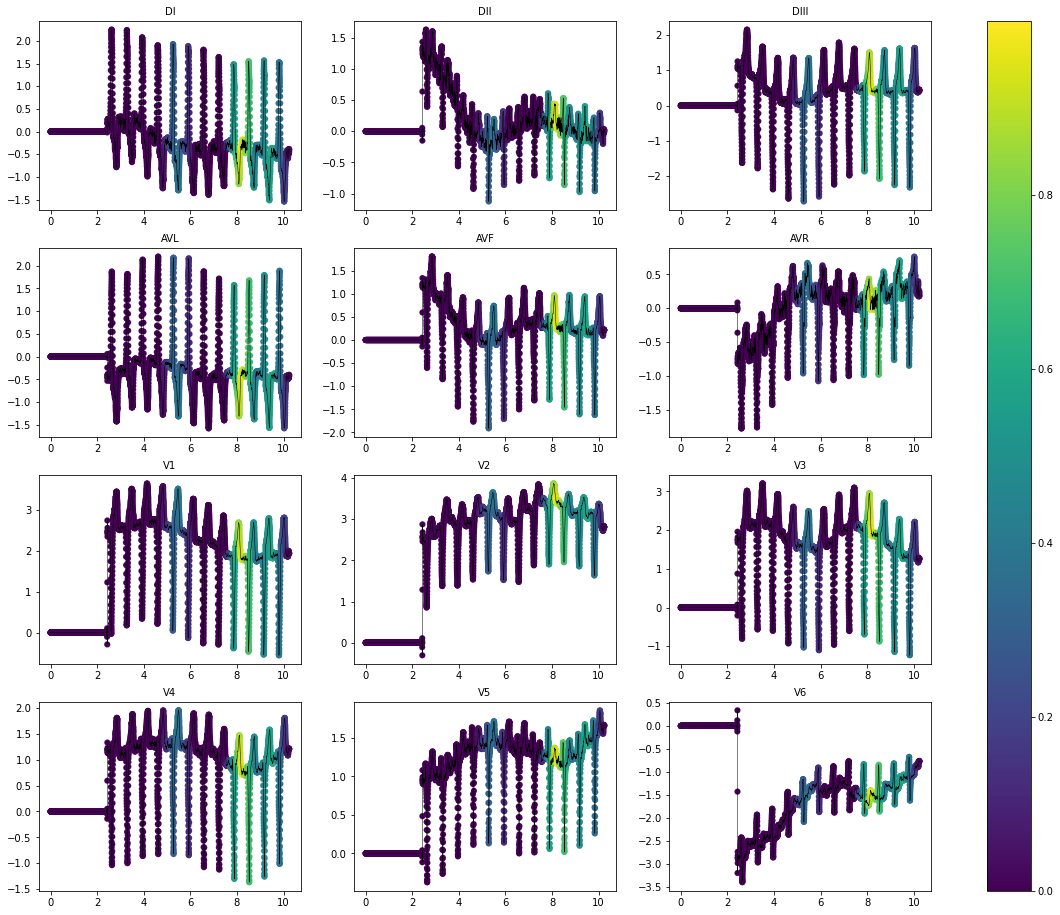

1dAVb             0
RBBB              0
LBBB              1
SB                0
AF                0
ST                0
nb_abnormality    1
Name: 28, dtype: int64
[0.01 0.   0.84 0.   0.01 0.  ]


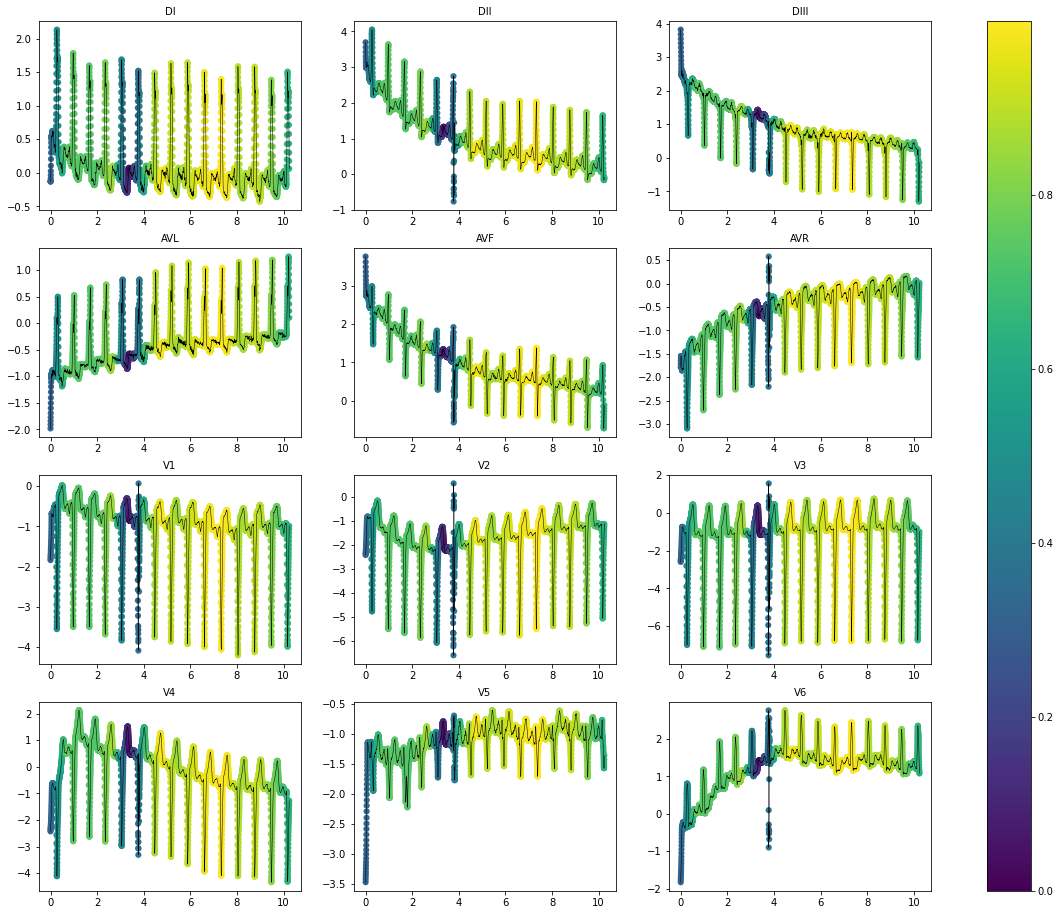

1dAVb             0
RBBB              0
LBBB              1
SB                0
AF                0
ST                0
nb_abnormality    1
Name: 58, dtype: int64
[0.   0.   0.52 0.   0.   0.  ]


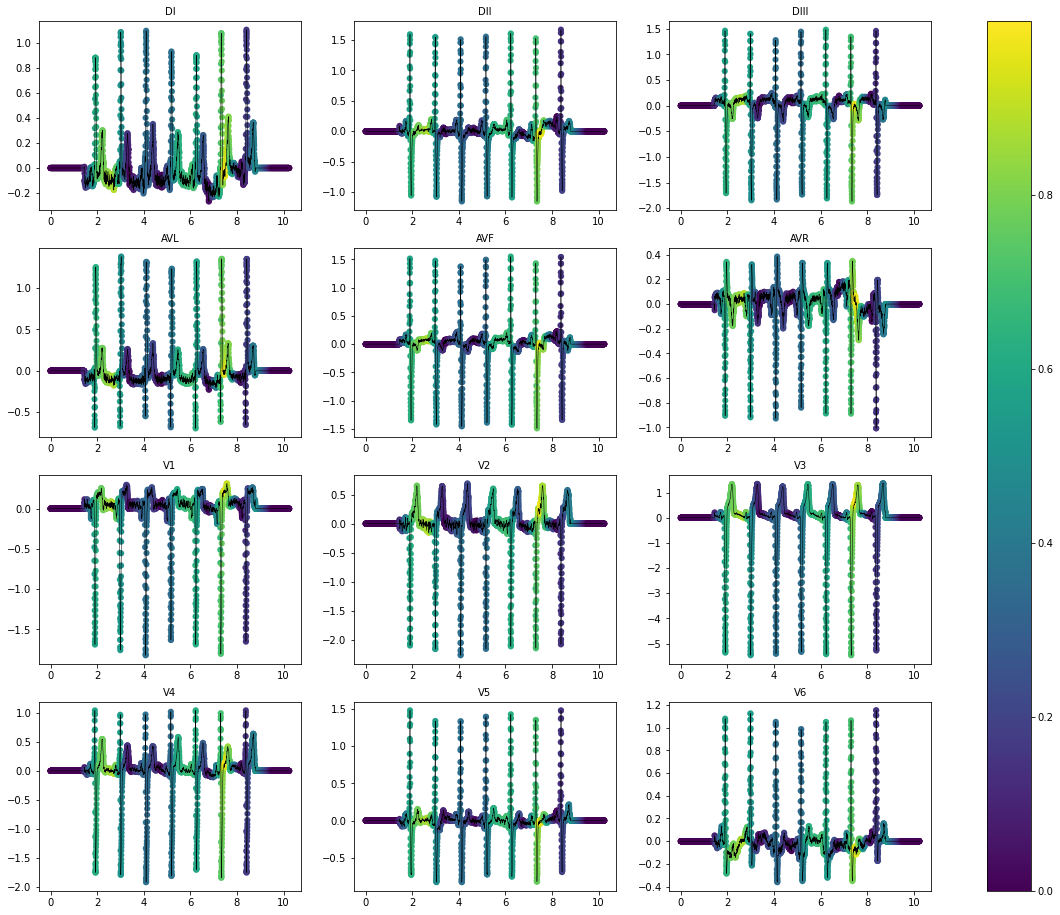



###########	SB	###########



In [ ]:
for idx_abn, abnormality in enumerate(df_goldStandard.columns[:-1]):
    print(abnormality,idx_abn)

print('-----------------------------------------------------------------')    

# visualisation a refaire en mieux
for idx_safe in df_goldStandard[df_goldStandard.nb_abnormality==0].index[:5]:
    fig, axs = plt.subplots(1, 3,figsize=(40,5))
    for i,pos in enumerate([1,6,11]):
        ax = axs[i]
        ax.set_title(lead_order[pos],fontsize=20)
        ax.plot(np.linspace(0,10.24,4096),x[idx_safe,:,pos],'k', linewidth=.5)
        
    plt.show()

for idx_abn, abnormality in enumerate(df_goldStandard.columns[:-1]):
    ## On recense tout les idx ou il y a abnormality 
    index_abnormality = df_goldStandard[(df_goldStandard[abnormality]==1)&(df_goldStandard.nb_abnormality==1)].index 
    print(f'\n\n###########\t{abnormality}\t###########\n')
    ## On ne prend que les 3 premiers pour exemple de pred
    preds = model.predict(x[index_abnormality[:3]])
    for i, pos in enumerate(index_abnormality[:3]):
        np.set_printoptions(precision=2,suppress=True)
        print(df_goldStandard.iloc[pos])
        print(preds[i])
        plot_grad_cam_ecg(x[pos],check_y=idx_abn)

Sur la visualisation les heatmaps des ECG nous permettent de voir quelles zones de l'ECG entraîne une telle prédiction